In [10]:
import os
from pydub import AudioSegment

def split_audio_to_segments(input_path, output_dir, segment_duration_ms=1500):
    """
    Ses dosyasını belirtilen sürelerde parçalara ayırır ve .wav formatında kaydeder.

    Args:
        input_path (str): Giriş ses dosyasının yolu.
        output_dir (str): Parçaların kaydedileceği dizin.
        segment_duration_ms (int): Parça süresi (milisaniye cinsinden).
    """
    try:
        # Ses dosyasını yükle
        print(f"Yükleniyor: {input_path}")  # Debugging: Yükleme mesajı
        audio = AudioSegment.from_file(input_path)

        # Parçaların saklanacağı klasörü oluştur
        os.makedirs(output_dir, exist_ok=True)

        # Ses dosyasını segmentlere ayır
        for i, start_time in enumerate(range(0, len(audio), segment_duration_ms)):
            segment = audio[start_time:start_time + segment_duration_ms]
            segment_filename = os.path.join(output_dir, f"segment_{i + 1}.wav")
            segment.export(segment_filename, format="wav")  # .wav formatında kaydet
            print(f"✓ Parça kaydedildi: {segment_filename}")

        print(f"✓ {input_path} başarıyla {segment_duration_ms}ms parçalarına bölündü.")
    except Exception as e:
        print(f"✗ Hata: {input_path} dosyası işlenirken bir sorun oluştu. Hata mesajı: {str(e)}")

def process_audio_files(root_path, output_base_dir):
    """
    Ses dosyalarını tek bir klasörde işler.

    Args:
        root_path (str): Ses dosyalarının bulunduğu ana klasör.
        output_base_dir (str): Çıkış klasörünün ana yolu.
    """
    if not os.path.exists(root_path):
        print(f"✗ {root_path} dizini bulunamadı!")
        return

    if not os.path.exists(output_base_dir):
        print(f"✗ Çıkış dizini {output_base_dir} mevcut değil!")
        return

    # Ana klasördeki dosyaları kontrol et
    for audio_file in os.listdir(root_path):
        audio_file_path = os.path.join(root_path, audio_file)
        print(f"Bulunan dosya: {audio_file_path}")  # Debugging: Bulunan dosya çıktısı

        # Dosya uzantısı uygun olan dosyaları işleyin
        if audio_file.endswith(('.m4a', '.mp4', '.wav', '.flac')) and os.path.isfile(audio_file_path):
            person = os.path.splitext(audio_file)[0]  # Dosya adını kişiye dönüştür (örneğin 'elif.m4a' -> 'elif')
            output_dir = os.path.join(output_base_dir, person)
            print(f"  İşleniyor: {audio_file_path}")
            split_audio_to_segments(audio_file_path, output_dir)
        else:
            print(f"  Uygun olmayan dosya: {audio_file}")

# Ana klasör yolunu ve çıkış dizinini belirt
root_path = r'../Audio'  # Ses dosyalarının bulunduğu ana klasör
output_base_dir = r'../Backend/data'  # Parçaların kaydedileceği ana klasör

print("Ses dosyaları işleniyor...")
process_audio_files(root_path, output_base_dir)


Ses dosyaları işleniyor...
Bulunan dosya: ../Audio\elif.m4a
  İşleniyor: ../Audio\elif.m4a
Yükleniyor: ../Audio\elif.m4a
✓ Parça kaydedildi: ../Backend/data\elif\segment_1.wav
✓ Parça kaydedildi: ../Backend/data\elif\segment_2.wav
✓ Parça kaydedildi: ../Backend/data\elif\segment_3.wav
✓ Parça kaydedildi: ../Backend/data\elif\segment_4.wav
✓ Parça kaydedildi: ../Backend/data\elif\segment_5.wav
✓ Parça kaydedildi: ../Backend/data\elif\segment_6.wav
✓ Parça kaydedildi: ../Backend/data\elif\segment_7.wav
✓ Parça kaydedildi: ../Backend/data\elif\segment_8.wav
✓ Parça kaydedildi: ../Backend/data\elif\segment_9.wav
✓ Parça kaydedildi: ../Backend/data\elif\segment_10.wav
✓ Parça kaydedildi: ../Backend/data\elif\segment_11.wav
✓ Parça kaydedildi: ../Backend/data\elif\segment_12.wav
✓ Parça kaydedildi: ../Backend/data\elif\segment_13.wav
✓ Parça kaydedildi: ../Backend/data\elif\segment_14.wav
✓ Parça kaydedildi: ../Backend/data\elif\segment_15.wav
✓ Parça kaydedildi: ../Backend/data\elif\segment

In [13]:
import os
from pydub import AudioSegment
import numpy as np

def change_speed(sound, speed=1.0):
    """Ses hızını değiştirme"""
    sound = sound._spawn(sound.raw_data)
    sound = sound.set_frame_rate(int(sound.frame_rate * speed))
    return sound

def change_pitch_with_pydub(sound, pitch_factor=1.0):
    """Pydub kullanarak pitch değiştirme"""
    new_sample_rate = int(sound.frame_rate * (2 ** pitch_factor))
    sound = sound._spawn(sound.raw_data, overrides={'frame_rate': new_sample_rate})
    return sound

def add_noise(sound, noise_level=0.005):
    """Ses dosyasına gürültü ekleme"""
    samples = np.array(sound.get_array_of_samples())
    noise = np.random.normal(0, noise_level, len(samples))
    noisy_samples = samples + noise
    noisy_samples = np.clip(noisy_samples, -32768, 32767)  # 16-bit PCM
    sound = AudioSegment(
        noisy_samples.astype(np.int16).tobytes(),
        frame_rate=sound.frame_rate,
        sample_width=2,
        channels=sound.channels,
    )
    return sound

def save_augmented_sound(sound, output_path):
    """Çoğaltılmış ses dosyasını kaydetme"""
    sound.export(output_path, format="wav")

def augment_audio(input_file, output_dir, person):
    """Ses dosyasını çoğaltma ve etiketleme"""
    try:
        sound = AudioSegment.from_wav(input_file)
    except Exception as e:
        print(f"Error loading {input_file}: {e}")
        return

    # Veri artırma işlemleri
    augmented_sounds = []
    
    # Hız değişikliği
    augmented_sounds.append(change_speed(sound, speed=1.2))
    augmented_sounds.append(change_speed(sound, speed=0.8))
    
    # Pitch değişikliği
    augmented_sounds.append(change_pitch_with_pydub(sound, pitch_factor=0.2))
    augmented_sounds.append(change_pitch_with_pydub(sound, pitch_factor=-0.2))
    
    # Gürültü ekleme
    augmented_sounds.append(add_noise(sound, noise_level=0.01))
    
    # Yeni dosyaları kaydetme
    person_folder = os.path.join(output_dir, person)  # Kişiye ait klasör
    os.makedirs(person_folder, exist_ok=True)
    
    base_name = os.path.splitext(os.path.basename(input_file))[0]
    
    for i, augmented_sound in enumerate(augmented_sounds):
        # Kayıt yeri doğrudan Audios dizini altında olacak şekilde
        output_path = os.path.join(person_folder, f"{base_name}_augmented_{i+1}.wav")
        
        # Eğer dosya zaten varsa, yeni dosya eklemeyin
        if not os.path.exists(output_path):
            save_augmented_sound(augmented_sound, output_path)
            print(f"Saved augmented sound to: {output_path}")  # Çıktı mesajı
        else:
            print(f"File {output_path} already exists, skipping...")  # Dosya mevcutsa, mesaj yazdır

def process_all_folders(directory):
    """Klasör yapısındaki her dosyayı dolaşarak ses çoğaltma işlemi yapma"""
    output_dir = "Audios"  # Çoğaltılmış ses dosyalarının kaydedileceği ana klasör (doğrudan Audios dizini)
    
    # Klasördeki dosyaları kontrol et
    for person in os.listdir(directory):
        person_path = os.path.join(directory, person)
        
        if os.path.isdir(person_path):  # Kişi klasörlerini kontrol et
            print(f"Processing folder for {person}...")  # Kişi adı yazdırılacak
            for file in os.listdir(person_path):
                if file.endswith('.wav'):
                    file_path = os.path.join(person_path, file)
                    
                    # Dosyayı çoğaltma
                    print(f"Processing {file_path}...")
                    augment_audio(file_path, output_dir, person)  # Ses dosyasını çoğaltma

# Örnek kullanım
directory = r"..\Backend\data"  # Ses dosyalarınızın bulunduğu ana klasör (örn. "irem", "elif", "nazli" klasörleri içinde)
process_all_folders(directory)


Processing folder for elif...
Processing ..\Backend\data\elif\segment_1.wav...
File Audios\elif\segment_1_augmented_1.wav already exists, skipping...
File Audios\elif\segment_1_augmented_2.wav already exists, skipping...
File Audios\elif\segment_1_augmented_3.wav already exists, skipping...
File Audios\elif\segment_1_augmented_4.wav already exists, skipping...
File Audios\elif\segment_1_augmented_5.wav already exists, skipping...
Processing ..\Backend\data\elif\segment_10.wav...
File Audios\elif\segment_10_augmented_1.wav already exists, skipping...
File Audios\elif\segment_10_augmented_2.wav already exists, skipping...
File Audios\elif\segment_10_augmented_3.wav already exists, skipping...
File Audios\elif\segment_10_augmented_4.wav already exists, skipping...
File Audios\elif\segment_10_augmented_5.wav already exists, skipping...
Processing ..\Backend\data\elif\segment_11.wav...
File Audios\elif\segment_11_augmented_1.wav already exists, skipping...
File Audios\elif\segment_11_augmen

In [14]:
import librosa
import numpy as np
import os
import pandas as pd

def extract_features(file_path):
    """
    Belirtilen ses dosyasından özellikleri çıkarır.
    
    Parameters:
        file_path (str): Ses dosyasının yolu.
        
    Returns:
        np.array: Çıkarılan özelliklerin birleştirilmiş hali.
    """
    try:
        # Ses dosyasını yükleyin
        y, sr = librosa.load(file_path, sr=None)
        
        # MFCC çıkarımı
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_mean = np.mean(mfcc, axis=1)  # MFCC ortalamaları

        # Chroma çıkarımı
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        chroma_mean = np.mean(chroma, axis=1)

        # RMS Energy çıkarımı
        rms = librosa.feature.rms(y=y)
        rms_mean = np.mean(rms)

        # Zero-Crossing Rate çıkarımı
        zcr = librosa.feature.zero_crossing_rate(y=y)
        zcr_mean = np.mean(zcr)
        
        # Özellikleri birleştir
        features = np.hstack((mfcc_mean, chroma_mean, rms_mean, zcr_mean))
        return features

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


def process_audio_files(directory):
    """
    Belirtilen dizindeki ses dosyalarını işler ve özellikleri çıkarır.
    
    Parameters:
        directory (str): Ses dosyalarının bulunduğu ana klasörün yolu.
        
    Returns:
        pd.DataFrame: Özellikleri ve etiketleri içeren bir DataFrame.
    """
    features_list = []
    labels = []
    
    if not os.path.isdir(directory):
        print(f"Error: The directory {directory} does not exist.")
        return pd.DataFrame()
    
    # Ana dizindeki her bir alt klasörü kontrol et
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        
        if os.path.isdir(label_path):  # Sadece klasörleri işle
            for file in os.listdir(label_path):
                if file.endswith('.wav'):  # Yalnızca .wav dosyalarını işle
                    file_path = os.path.join(label_path, file)
                    print(f"Processing file: {file_path}")
                    
                    features = extract_features(file_path)
                    if features is not None:
                        features_list.append(features)
                        labels.append(label)
                    else:
                        print(f"Skipping file due to error: {file_path}")
    
    # Çıkarılan özelliklerden bir DataFrame oluştur
    if features_list:
        column_names = [
            f'MFCC_{i+1}' for i in range(13)
        ] + [
            f'Chroma_{i+1}' for i in range(12)
        ] + ['RMS', 'Zero_Crossing_Rate']
        
        features_df = pd.DataFrame(features_list, columns=column_names)
        features_df['label'] = labels
        return features_df
    else:
        print("No features extracted.")
        return pd.DataFrame()

# Örnek kullanım
directory = "Audios"  # Ses dosyalarınızın bulunduğu ana klasör
features_df = process_audio_files(directory)

# Özellikleri bir CSV dosyasına kaydet
output_file = 'new_audio_features.csv'
try:
    if not features_df.empty:
        features_df.to_csv(output_file, index=False)
        print(f"Features extracted and saved to '{output_file}'.")
    else:
        print("No features to save.")
except Exception as e:
    print(f"Error saving to CSV: {e}")

# Özelliklerin doğruluğunu kontrol et
if not features_df.empty:
    print("Preview of extracted features:")
    print(features_df.head())  # İlk birkaç satırı görüntüleyin
    print("\nDataFrame Info:")
    print(features_df.info())  # Veri tipi ve eksik değer bilgisi


Processing file: Audios\elif\segment_10_augmented_1.wav
Processing file: Audios\elif\segment_10_augmented_2.wav
Processing file: Audios\elif\segment_10_augmented_3.wav
Processing file: Audios\elif\segment_10_augmented_4.wav
Processing file: Audios\elif\segment_10_augmented_5.wav
Processing file: Audios\elif\segment_11_augmented_1.wav
Processing file: Audios\elif\segment_11_augmented_2.wav
Processing file: Audios\elif\segment_11_augmented_3.wav
Processing file: Audios\elif\segment_11_augmented_4.wav
Processing file: Audios\elif\segment_11_augmented_5.wav
Processing file: Audios\elif\segment_12_augmented_1.wav
Processing file: Audios\elif\segment_12_augmented_2.wav
Processing file: Audios\elif\segment_12_augmented_3.wav
Processing file: Audios\elif\segment_12_augmented_4.wav
Processing file: Audios\elif\segment_12_augmented_5.wav
Processing file: Audios\elif\segment_13_augmented_1.wav
Processing file: Audios\elif\segment_13_augmented_2.wav
Processing file: Audios\elif\segment_13_augmente

In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def balance_and_scale_dataset(df):
    """
    Veri setindeki her etiketten eşit sayıda örnek alarak veri setini dengeler ve
    tüm özellikleri Min-Max skalasında 0-1 aralığına ölçeklendirir.
    
    Parameters:
        df (pd.DataFrame): Özellikleri ve etiket sütununu içeren veri seti.
    
    Returns:
        pd.DataFrame: Dengelenmiş ve ölçeklendirilmiş veri seti.
    """
    # Etiketlerin frekansını bulun
    label_counts = df['label'].value_counts()
    print("Original label distribution:")
    print(label_counts)
    
    # Minimum örnek sayısını belirle
    min_samples = label_counts.min()
    print(f"Balancing dataset to {min_samples} samples per label.")
    
    # Dengelenmiş veri setini oluştur
    balanced_df = pd.DataFrame()
    
    for label in label_counts.index:
        label_df = df[df['label'] == label]
        balanced_label_df = label_df.sample(n=min_samples, random_state=42)  # Rastgele örnek seçimi
        balanced_df = pd.concat([balanced_df, balanced_label_df], ignore_index=True)
    
    print("Balanced label distribution:")
    print(balanced_df['label'].value_counts())
    
    # Özellik sütunları dışındaki her şeyi çıkar
    features = balanced_df.drop(columns=['label'])
    
    # Min-Max ölçeklendirme işlemi
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(features)
    
    # Ölçeklendirilmiş veriyi DataFrame'e dönüştür
    scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
    
    # Etiket sütununu tekrar ekle
    scaled_df['label'] = balanced_df['label']
    
    return scaled_df

# Örnek kullanım
if not features_df.empty:
    balanced_scaled_features_df = balance_and_scale_dataset(features_df)
    
    # Dengelenmiş ve ölçeklendirilmiş veri setini kaydet
    balanced_scaled_features_df.to_csv('balanced_scaled_audio_features.csv', index=False)
    print("Balanced and scaled dataset saved to 'balanced_scaled_audio_features.csv'.")


Original label distribution:
label
elif     325
irem     305
nazli    305
Name: count, dtype: int64
Balancing dataset to 305 samples per label.
Balanced label distribution:
label
elif     305
irem     305
nazli    305
Name: count, dtype: int64
Balanced and scaled dataset saved to 'balanced_scaled_audio_features.csv'.


In [30]:
import os
import subprocess

def convert_to_wav(input_path, output_path):
    try:
        # ffmpeg ile .m4a veya .mp4 dosyasını .wav formatına dönüştürme
        subprocess.run(['ffmpeg', '-i', input_path, output_path], check=True)
        print(f"Converted {input_path} to {output_path}")
    except Exception as e:
        print(f"Error converting {input_path} to .wav: {e}")

def convert_all_files(directory):
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        if file.endswith('.m4a') or file.endswith('.mp4'):
            output_path = os.path.splitext(file_path)[0] + '.wav'
            convert_to_wav(file_path, output_path)

# Ses dosyalarının bulunduğu dizin
directory = r'../Audio'
convert_all_files(directory)


Converted ../Audio\elif.m4a to ../Audio\elif.wav
Converted ../Audio\irem.mp4 to ../Audio\irem.wav
Converted ../Audio\nazli.mp4 to ../Audio\nazli.wav


Ses Dosyaları İçin WAVEFORM VE SPECTROGRAM HİSTOGRAMI İŞLEMİ BAŞLIYOR...
Processing file: ../Audio\elif.wav
Loading file: ../Audio\elif.wav


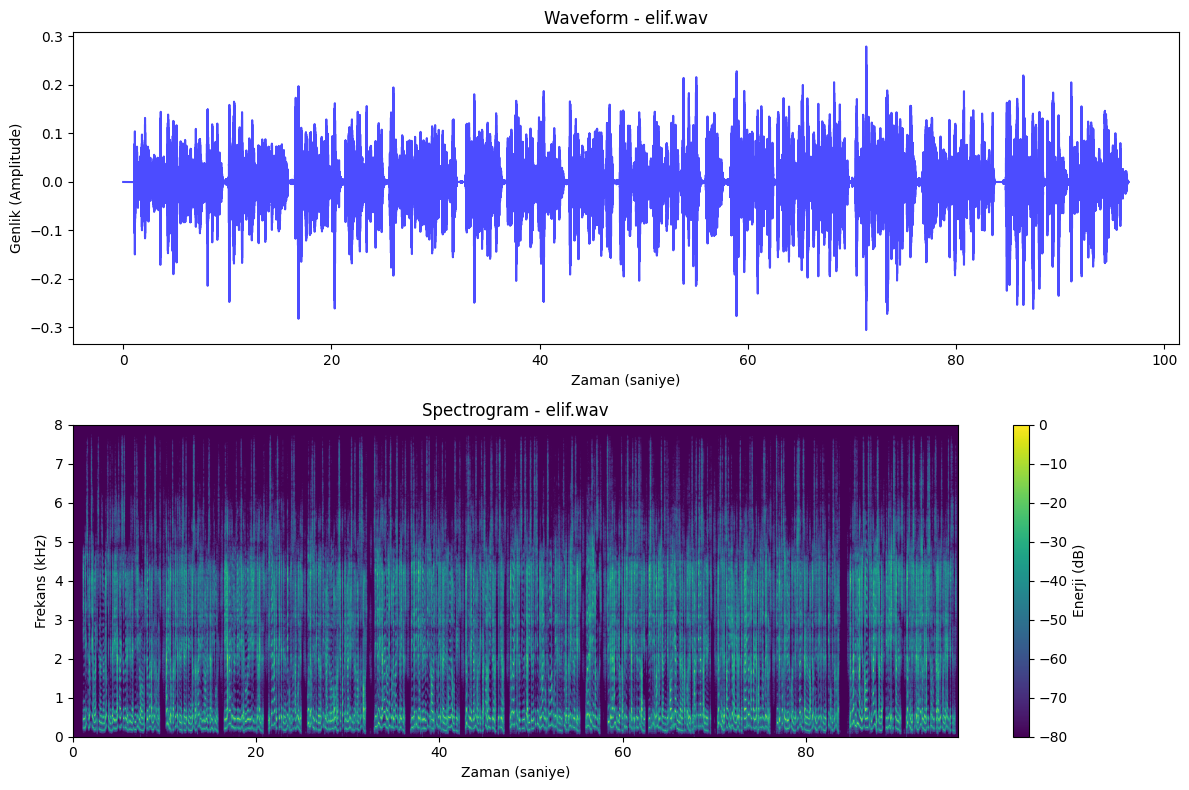

Processing file: ../Audio\irem.wav
Loading file: ../Audio\irem.wav


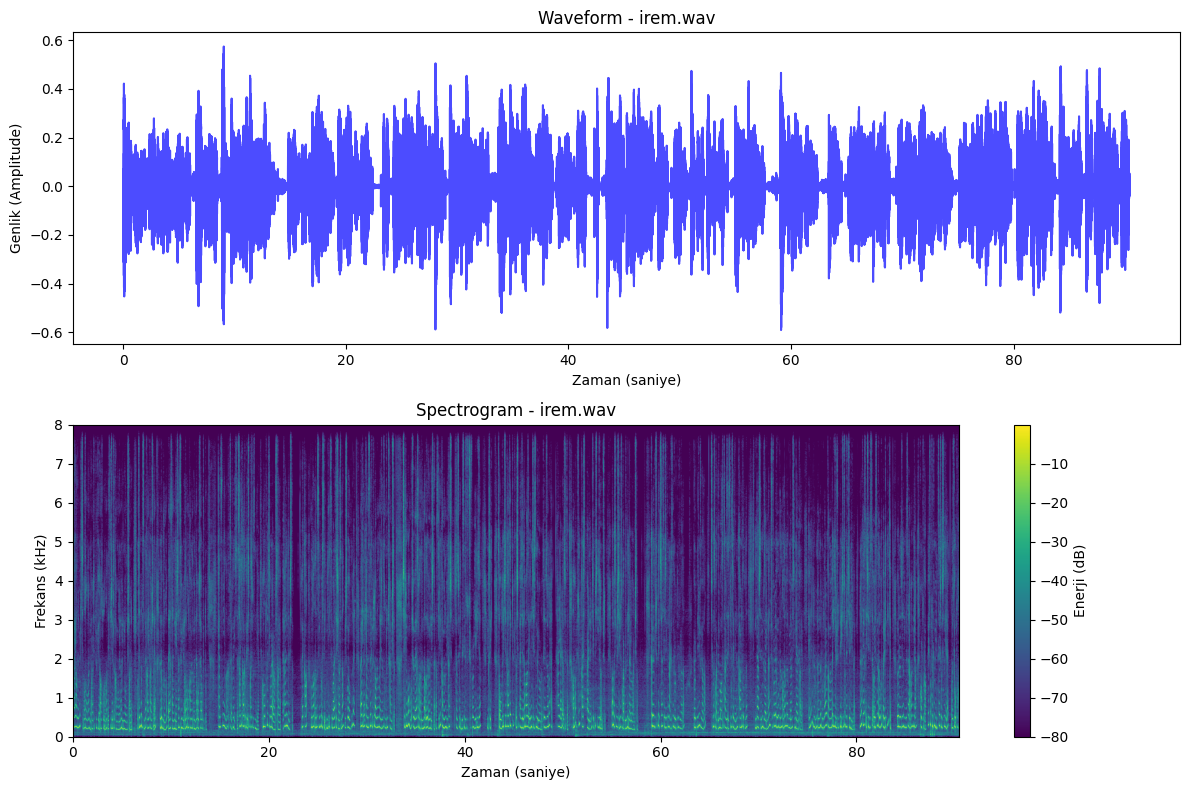

Processing file: ../Audio\nazli.wav
Loading file: ../Audio\nazli.wav


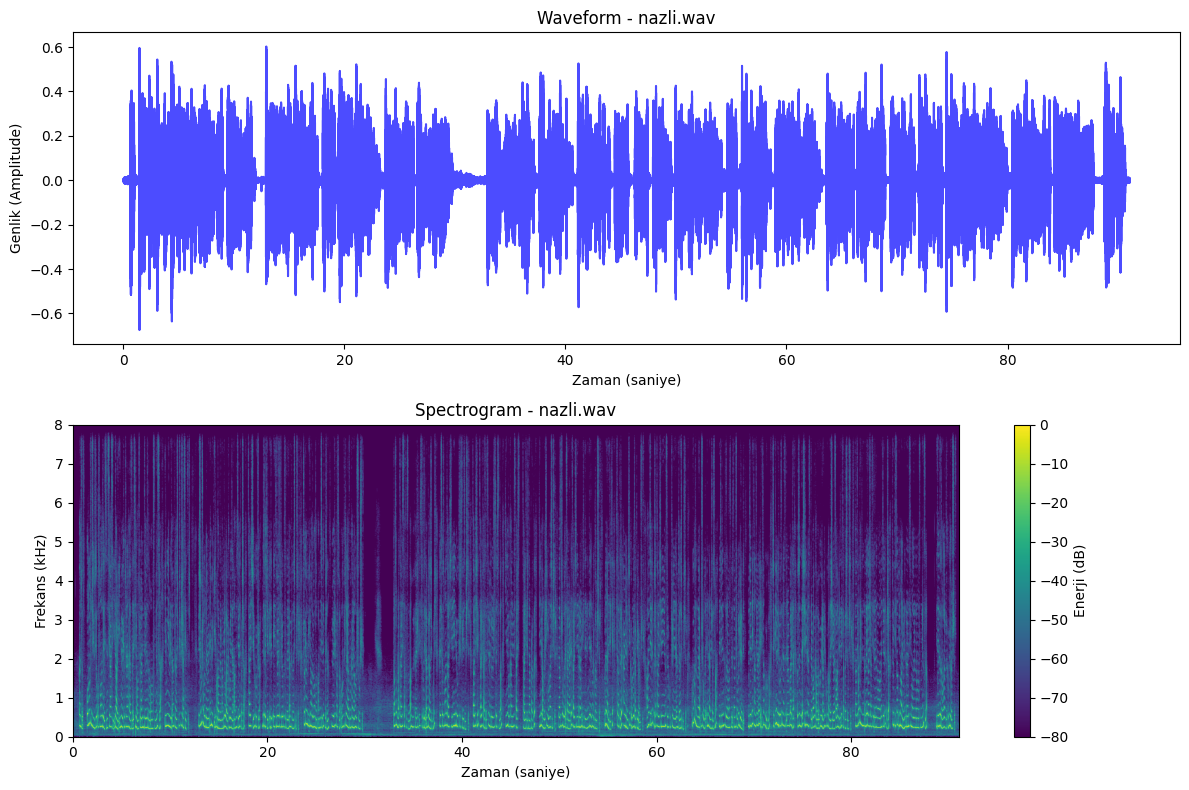

In [31]:
import librosa
import matplotlib.pyplot as plt
import os
import numpy as np

# Waveform ve Spectrogram histogramlarını çizmek için fonksiyon
def plot_waveform_and_spectrogram_histogram(file_path):
    try:
        print(f"Loading file: {file_path}")  # Dosya yolu loglama
        # Ses dosyasını yükle
        y, sr = librosa.load(file_path, sr=16000)
        
        # Waveform (dalga formu) histogramı
        plt.figure(figsize=(12, 8))

        # Waveform Histogramı: Amplitude ve Zaman
        plt.subplot(2, 1, 1)
        plt.plot(np.linspace(0, len(y) / sr, num=len(y)), y, color='blue', alpha=0.7)
        plt.title(f'Waveform - {os.path.basename(file_path)}')
        plt.xlabel('Zaman (saniye)')
        plt.ylabel('Genlik (Amplitude)')

        # Spectrogram (frekans spektrumu) histogramı
        D = librosa.stft(y)  # Short-Time Fourier Transform
        S_db, phase = librosa.magphase(D)  # Sadece genlik
        S_db = librosa.amplitude_to_db(S_db, ref=np.max)  # Logaritmik dönüşüm (dB)

        # Spectrogram Enerji Histogramı: kHz ve Zaman
        plt.subplot(2, 1, 2)
        plt.imshow(S_db, aspect='auto', cmap='viridis', origin='lower', 
                   extent=[0, len(y) / sr, 0, sr / 2000])  # X: Zaman, Y: Frekans (kHz)
        plt.title(f'Spectrogram - {os.path.basename(file_path)}')
        plt.xlabel('Zaman (saniye)')
        plt.ylabel('Frekans (kHz)')
        plt.colorbar(label='Enerji (dB)')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Ana dizindeki tüm kişiler için ses dosyalarını işle ve histogramları çiz
def process_and_plot_waveform_spectrogram_histograms(root_path):
    # Root dizindeki her dosya için işlem yap
    for file in os.listdir(root_path):
        file_path = os.path.join(root_path, file)
        if file.endswith('.wav'):
            print(f"Processing file: {file_path}")
            plot_waveform_and_spectrogram_histogram(file_path)

# Ses dosyalarının bulunduğu ana dizin
root_path = r"../Audio"  # Ses dosyalarının bulunduğu dizin

# Klasördeki tüm .wav dosyalarını işleyip histogramları çiz
print("Ses Dosyaları İçin WAVEFORM VE SPECTROGRAM HİSTOGRAMI İŞLEMİ BAŞLIYOR...")
process_and_plot_waveform_spectrogram_histograms(root_path)
